In [1]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 787.7 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 2.3 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.4 MB 4.5 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.4 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Carregar o conjunto de dados
df = pd.read_csv(r'..\train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
# Para a análise de associação, precisamos de dados binários
# Vamos converter algumas características categóricas em formato binário
# Por exemplo, vamos considerar a qualidade geral (OverallQual) e a condição geral (OverallCond)
# Vamos assumir que uma qualidade ou condição 'Alta' é representada por um valor maior ou igual a 5

In [73]:
# Criar colunas binárias para 'OverallQual' e 'TotalBsmtSF'
df['QualidadeAlta'] = df['OverallQual'].apply(lambda x: 'Alta' if x >= 5 else 'Baixa')
df['PoraoGrande'] = df['TotalBsmtSF'].apply(lambda x: 'Grande' if x >= 1000 else 'Pequeno')

In [74]:
# Selecionar apenas as colunas binárias para a análise de associação
df_binario = df[['QualidadeAlta', 'PoraoGrande']]

In [75]:
# Converter o DataFrame em uma lista de listas (transações)
transacoes = df_binario.values.tolist()

In [76]:
# Transformar os dados em um formato aceitável pelo Apriori
te = TransactionEncoder()
te_ary = te.fit(transacoes).transform(transacoes)
df_apriori = pd.DataFrame(te_ary, columns=te.columns_)

In [77]:
# Verificar as primeiras linhas do DataFrame transformado
print(df_apriori.head())

   Alta  Baixa  Grande  Pequeno
0  True  False   False     True
1  True  False    True    False
2  True  False   False     True
3  True  False   False     True
4  True  False    True    False


In [78]:
# Aplicar o Apriori com suporte mínimo de 0.1 (ajuste conforme necessário)
frequent_itemsets = apriori(df_apriori, min_support=0.1, use_colnames=True)

In [79]:
# Imprimir os conjuntos de itens frequentes encontrados
print(frequent_itemsets)

    support         itemsets
0  0.903425           (Alta)
1  0.491096         (Grande)
2  0.508904        (Pequeno)
3  0.473288   (Grande, Alta)
4  0.430137  (Pequeno, Alta)


In [80]:
# Gerar as regras de associação com um limiar mínimo de confiança de 0.7 (ajuste conforme necessário)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [82]:
# Imprimir as regras de associação com antecedentes, consequentes, suporte e confiança
print(rules[['antecedents', 'consequents', 'support', 'confidence']])

  antecedents consequents   support  confidence
0    (Grande)      (Alta)  0.473288    0.963738
1   (Pequeno)      (Alta)  0.430137    0.845222


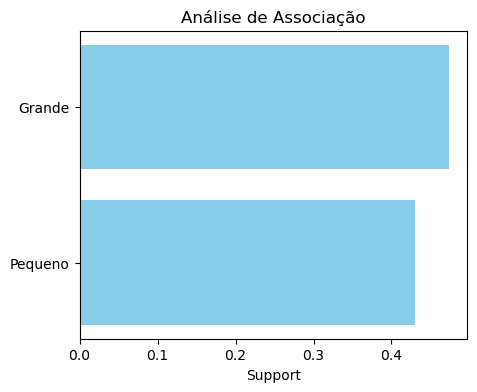

In [91]:
# Gerar o gráfico de barras
plt.figure(figsize=(5, 4))
plt.barh(range(len(rules)), rules['support'], align='center', color='skyblue')
plt.yticks(range(len(rules)), [', '.join(items) for items in rules['antecedents']])
plt.xlabel('Support')
plt.title('Análise de Associação')
plt.gca().invert_yaxis()  # Inverter eixo y para mostrar a regra mais importante no topo
plt.show()